# AG002 - Engenharias de Computação e Software - Inatel

### Nome: João Vítor Carvalho de Paula Dutra

Você deverá utilizar seus conhecimentos para, a partir do conjunto de dados proposto, treinar, avaliar e disponibilizar um modelo de aprendizado de máquina para apontar o desfecho de uma partida de jogo da velha.

## Passo 1: Importar bibliotecas

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## Passo 2: Carregar os dados

In [3]:
dados = pd.read_csv('./dados.csv')

In [4]:
# Visualizar as primeiras linhas do conjunto de dados
print(dados.head())

   1  2  3  4  5  6  7  8  9 resultado
0  x  x  x  x  o  o  x  o  o  positivo
1  x  x  x  x  o  o  o  x  o  positivo
2  x  x  x  x  o  o  o  o  x  positivo
3  x  x  x  x  o  o  o  b  b  positivo
4  x  x  x  x  o  o  b  o  b  positivo


### Passo 3: Converter os valores presentes para números inteiros

In [5]:
# Mapeamento para conversão
mapeamento = {'o': -1, 'b': 0, 'x': 1, 'negativo': -1, 'positivo': 1}
dados = dados.replace(mapeamento)

### Passo 4: Preparar os dados para treinamento e teste

In [6]:
X = dados.drop('resultado', axis=1)  # Colunas de recursos
y = dados['resultado']  # Rótulos

# Dividir os dados em treino e teste (80-20)
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)


### Passo 5: Treinar o modelo Decision Tree

In [7]:
# Instanciar o modelo Decision Tree Classifier
modelo = DecisionTreeClassifier()

# Treinar o modelo
modelo.fit(X_treino, y_treino)

DecisionTreeClassifier()

### Passo 6.1: Avaliar o modelo

In [8]:
# Avaliar o modelo
acuracia = modelo.score(X_teste, y_teste)
print(f'Acurácia do modelo: {acuracia}')

# Realizar previsões
previsoes = modelo.predict(X_teste)

print(classification_report(y_teste, previsoes))

Acurácia do modelo: 0.984375
              precision    recall  f1-score   support

          -1       1.00      0.96      0.98        67
           1       0.98      1.00      0.99       125

    accuracy                           0.98       192
   macro avg       0.99      0.98      0.98       192
weighted avg       0.98      0.98      0.98       192



#### Passo 6.2: Métricas de avaliação

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

y_pred = modelo.predict(X_teste)
conf_matrix = confusion_matrix(y_teste, y_pred)
accuracy = accuracy_score(y_teste, y_pred)
precision = precision_score(y_teste, y_pred)
recall = recall_score(y_teste, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)

Confusion Matrix:
 [[ 64   3]
 [  0 125]]
Acurácia: 0.984375
Precisão: 0.9765625
Recall: 1.0


#### 6.3: Métricas em Grafico

Confusion Matrix:

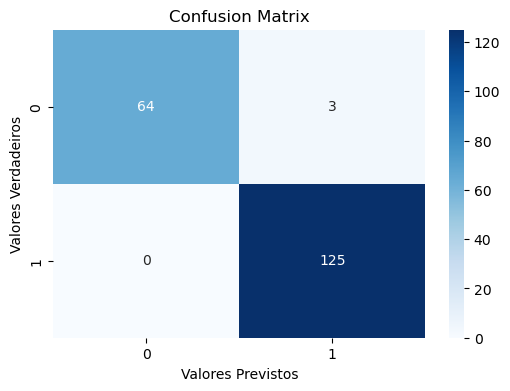

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotar a matriz de confusão como um heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Verdadeiros')
plt.title('Confusion Matrix')
plt.show()


Gráfico de Aprendizado:

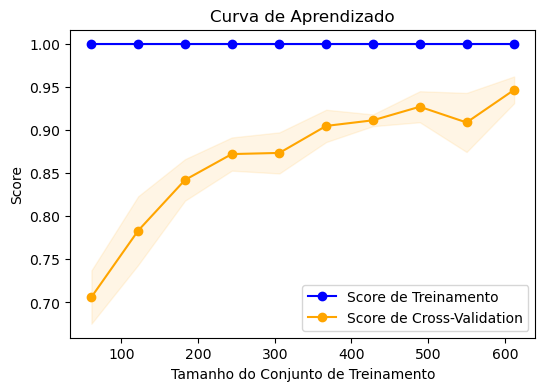

In [11]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    modelo, X_treino, y_treino, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(6, 4))
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="orange")
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Score de Treinamento")
plt.plot(train_sizes, test_mean, 'o-', color="orange", label="Score de Cross-Validation")
plt.xlabel("Tamanho do Conjunto de Treinamento")
plt.ylabel("Score")
plt.title("Curva de Aprendizado")
plt.legend(loc="best")
plt.show()


### Passo 7: Classificar dados inseridos pelo usuário

In [12]:
def classificar_dados(modelo, novos_dados):
    resultado = modelo.predict(novos_dados)
    print(resultado)
    if 1 in resultado:
        return "Sim, é uma vitória para 'X'."
    else:
        return "Não é uma vitória para 'X'."

novos_dados = pd.DataFrame([[1, -1, 0, 0, 1, -1, 0, -1, 1]])  # Substitua pelos seus dados
nomes_caracteristicas = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
novos_dados.columns = nomes_caracteristicas  # Associar nomes de características ao DataFrame

resultado_classificacao = classificar_dados(modelo, novos_dados)
print(resultado_classificacao)


[1]
Sim, é uma vitória para 'X'.
